In [1]:
import docx2txt
from docx2python import docx2python
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')


# read in word file
text_input = docx2python('C:/Users/Hedi mineoui/Desktop/Apple_NLP/apple.docx')

text_input_content = text_input.text

#remove \n character and convert all words into lower cases
text_input_content = text_input_content.replace("\n", " ").lower()

# remove stop words from text
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(text_input_content) 
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

filtered_sentence = " ".join(filtered_sentence)

# remove all special character with regular expression
filtered_sentence = re.sub(r'[^\w]', ' ', filtered_sentence)

#remove number from text

filtered_sentence = ''.join([i for i in filtered_sentence if not i.isdigit()])

[nltk_data] Downloading package punkt to C:\Users\Hedi
[nltk_data]     mineoui\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Hedi
[nltk_data]     mineoui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Word stemming
import nltk
from nltk.stem import PorterStemmer
#nltk.download()
porter = PorterStemmer()

token_words=word_tokenize(filtered_sentence)

stem_sentence=[]
for word in token_words:
    stem_sentence.append(porter.stem(word))
    stem_sentence.append(" ")
    
filtered_stemming_sentence = " ".join(stem_sentence)

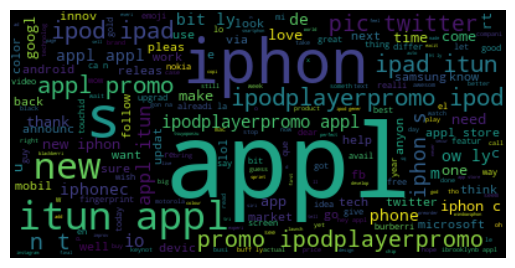

In [3]:
# Generating Wodcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(filtered_stemming_sentence)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()